## **PHASE 1 PROJECT: AVIATION**
## <u>**Overview**</u>
We will use data cleaning, imputation, analysis, and visualization to generate insights for purchasing and operating airplanes.

## <u>**Business Problem**</u>
Our company is interested expanding into new industries to diversify its portfolio.Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft.We are to determine which aircraft are the lowest risk for the company to start this new business endeavor.

***Some of the business objectives we will focus on are:***
 - Try to give a brief understanding of the potential risks of aircraft.
 - Examine accident occurrences over time
 - Determining whether it is better purchasing and operating airplanes for commercial or private enterprises
 - Determining which aircraft are the lowest risk for the company when starting this new business endeavor.

## <u>**Data**</u>
The dataset used is from the National Transportation Safety Board which includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.


## <u>Data Understanding/EDA</u>

##### Importing Libraries

In [446]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Load Data(Encoding)

In [447]:
df = pd.read_csv("AviationData.csv", encoding="latin1", low_memory=False)
df



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [448]:
df.head()



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


##### Summary Statistics

In [449]:
#Getting insight on no of rows and columns,data types and null values
df.info() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [450]:
# Understanding data by the mean count of columns that have values
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [451]:
df.columns



Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## <u> **Data Cleaning/Preparation** </u>
We will check for missing values, handle missing values, check for duplicates, and data type conversion

In [452]:
#Checking if the Event ID has duplicates
df["Event.Id"].duplicated().value_counts()

Event.Id
False    87951
True       938
Name: count, dtype: int64

In [453]:
# Checking if the duplicate event.id is the same accident
df[df["Event.Id"].duplicated(keep=False)]


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
117,20020917X01908,Accident,DCA82AA012B,1982-01-19,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Personal,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
118,20020917X01908,Accident,DCA82AA012A,1982-01-19,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Executive/corporate,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
153,20020917X02259,Accident,LAX82FA049A,1982-01-23,"VICTORVILLE, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,4.0,0.0,VMC,Unknown,Probable Cause,23-01-1983
158,20020917X02400,Accident,MIA82FA038B,1982-01-23,"NEWPORT RICHEY, FL",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Cruise,Probable Cause,23-01-1983
159,20020917X02400,Accident,MIA82FA038A,1982-01-23,"NEWPORT RICHEY, FL",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,23-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88796,20221121106336,Accident,WPR23LA041,2022-11-18,"Las Vegas, NV",United States,361239N,1151140W,VGT,NORTH LAS VEGAS,...,Instructional,702 HELICOPTER INC,0.0,0.0,0.0,3.0,VMC,NaN,NaN,07-12-2022
88797,20221122106340,Incident,DCA23WA071,2022-11-18,"Marrakech,",Morocco,NaN,NaN,NaN,NaN,...,NaN,British Airways,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88798,20221122106340,Incident,DCA23WA071,2022-11-18,"Marrakech,",Morocco,NaN,NaN,NaN,NaN,...,NaN,Valair Private Jets,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88813,20221123106354,Accident,WPR23LA045,2022-11-22,"San Diego, CA",United States,323414N,1165825W,SDM,Brown Field Municipal Airport,...,Instructional,HeliStream Inc.,0.0,0.0,0.0,4.0,VMC,NaN,NaN,22-12-2022


In [454]:
# Understanding the duplicate with a less data
df[df["Event.Id"].duplicated(keep=False)].head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
117,20020917X01908,Accident,DCA82AA012B,1982-01-19,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Personal,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
118,20020917X01908,Accident,DCA82AA012A,1982-01-19,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Executive/corporate,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
153,20020917X02259,Accident,LAX82FA049A,1982-01-23,"VICTORVILLE, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,4.0,0.0,VMC,Unknown,Probable Cause,23-01-1983
158,20020917X02400,Accident,MIA82FA038B,1982-01-23,"NEWPORT RICHEY, FL",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Cruise,Probable Cause,23-01-1983
159,20020917X02400,Accident,MIA82FA038A,1982-01-23,"NEWPORT RICHEY, FL",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,23-01-1983


###### Assumption
From the above df the Event.id has duplicates but in the rows duplicated there is a slight change in the Accident.Number, Purpose.of.flight or Broad.phase.of.flight.
Therefore I asssumed in the event there might have been two accidents with two aircraft

In [455]:
# Confirming our assumption by using accident no as a key
df[df["Accident.Number"].duplicated(keep=False)]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
87304,20220111104514,Accident,ERA22LA103,2022-01-08,"Knoxville, TN",United States,355750N,0835225W,DKX,KNOXVILLE DOWNTOWN ISLAND,...,Personal,NaN,0.0,0.0,0.0,4.0,VMC,NaN,The pilot of the Cessna 150s failure to avoid...,14-06-2022
87305,20220111104514,Accident,ERA22LA103,2022-01-08,"Knoxville, TN",United States,355750N,0835225W,DKX,KNOXVILLE DOWNTOWN ISLAND,...,Personal,NaN,0.0,0.0,0.0,4.0,VMC,NaN,The pilot of the Cessna 150s failure to avoid...,14-06-2022
87330,20220309104747,Incident,DCA22WA089,2022-01-15,"Sukkur, OF",Pakistan,NaN,NaN,NaN,NaN,...,NaN,Air Arabia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87331,20220309104747,Incident,DCA22WA089,2022-01-15,"Sukkur, OF",Pakistan,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87347,20220801105632,Incident,DCA22WA167,2022-01-22,"Kigali,",Rwanda,001587S,0030822E,NaN,NaN,...,NaN,RwandAir,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87348,20220801105632,Incident,DCA22WA167,2022-01-22,"Kigali,",Rwanda,001587S,0030822E,NaN,NaN,...,NaN,Ethopian Air,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87411,20220212104630,Accident,ERA22LA119,2022-02-11,"Naples, FL",United States,026930N,0081464W,APF,NAPLES MUNI,...,Personal,Tatann Aviation Inc.,0.0,0.0,0.0,2.0,VMC,NaN,"The biplane pilots inadequate visual lookout,...",22-09-2022
87412,20220212104630,Accident,ERA22LA119,2022-02-11,"Naples, FL",United States,026930N,0081464W,APF,NAPLES MUNI,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,"The biplane pilots inadequate visual lookout,...",22-09-2022
87548,20220323104818,Accident,CEN22LA149,2022-03-18,"Grapevine, TX",United States,032530N,0097251W,DFW,Dallas Ft. Worth,...,Business,MARTINAIRE AVIATION LLC,0.0,0.0,0.0,2.0,VMC,NaN,The failure of the pilot of the second aircraf...,05-07-2022
87549,20220323104818,Accident,CEN22LA149,2022-03-18,"Grapevine, TX",United States,032530N,0097251W,DFW,Dallas Ft. Worth,...,Business,MARTINAIRE AVIATION LLC,0.0,0.0,0.0,2.0,VMC,NaN,The failure of the pilot of the second aircraf...,05-07-2022


##### Dealing with Missing Values
We will look at columns with missing values and determine what we will do.

In [456]:
#Checking for missing data in columns
df.isna().sum()


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

###### **Assumption**
We will assume that the categorical data for the missing values cannot be found is therefore less relevant
We will work with numerical data eg Total Fatal Injuries, Total Serious Injuries, Total Uninjured

###### **Filter Relevant Columns**
It is easier to deal with the missing marks of the relevant columns

In [457]:
relevant_columns = [
    "Event.Date", "Location", "Country", "Injury.Severity", "Aircraft.damage", 
    "Aircraft.Category","Make", "Model", "Number.of.Engines", "Engine.Type", 
    "Purpose.of.flight", "Total.Fatal.Injuries", "Total.Serious.Injuries", 
    "Total.Minor.Injuries", "Total.Uninjured", "Weather.Condition", "Broad.phase.of.flight"
]

filtered_df = df.filter(items=relevant_columns).copy()
filtered_df

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,PIPER,PA-28-151,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
88885,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,BELLANCA,7ECA,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88887,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,CESSNA,210N,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


In [458]:
# Replace Total.Fatal.Injuries	Total.Serious.Injuries	Total.Minor.Injuries	Total.Uninjured	 missing values with 0's
filtered_df[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]] = (
    filtered_df[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]].fillna(0)
)


In [459]:
#Checking if null values in Total.Fatal.Injuries Total.Serious.Injuries	Total.Minor.Injuries Total.Uninjured are replaced
filtered_df[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]].isna().sum()

Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

In [460]:
# Replace Number.of.Engines with 1's
filtered_df["Number.of.Engines"] = filtered_df["Number.of.Engines"].fillna(1)

In [461]:
# Replace 0's with 1's
filtered_df.loc[:, "Number.of.Engines"] = filtered_df["Number.of.Engines"].replace(0, 1)

In [462]:
#Checking if null values in 
filtered_df[["Number.of.Engines"]].isna().sum()

Number.of.Engines    0
dtype: int64

In [463]:
#Changing Aircraft.Category to the same case
filtered_df.loc[:, "Make"] = filtered_df["Make"].str.title().str.strip()

In [464]:
filtered_df["Make"].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'James R Dernovsek',
       'Orlican S R O', 'Royse Ralph L'], dtype=object)

In [465]:
#Removing Unknown In Purpose of Flight
filtered_df = filtered_df[filtered_df["Purpose.of.flight"] != "Unknown"]


##### Dealing with Event.Date column 

In [466]:
#Checking the date column data type
filtered_df[["Event.Date"]].dtypes

Event.Date    object
dtype: object

In [467]:
#Converting to date format
filtered_df["Event.Date"] = pd.to_datetime(filtered_df["Event.Date"], errors="coerce")
filtered_df[["Event.Date"]].dtypes

C:\Users\hp\AppData\Local\Temp\ipykernel_10964\2825341930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Event.Date"] = pd.to_datetime(filtered_df["Event.Date"], errors="coerce")


Event.Date    datetime64[ns]
dtype: object

## <u> **Data Visualization** </u>

### <u> **Objectives** </u>
We will use data visualization to address some of our key objectives.

The first objective,try to give a brief understanding of the potential risks of aircraft, we will look at:
 - Does weather conditions cause any risk to aircrafts?
 - Does the engine type cause any risk to aircraft?
 - Does the number of engine cause any impact to the aircraft?
 - Does the model contribute to any risk?
 - Does the aircraft category affect risk?
 - Identify which phases of flight contribute most to accidents


#### **1.1 Does weather conditions cause any risk to aircrafts?**

In [468]:
#Change the weather.condition data to title case
filtered_df = filtered_df.copy()
filtered_df["Weather.Condition"] = filtered_df["Weather.Condition"].str.title()

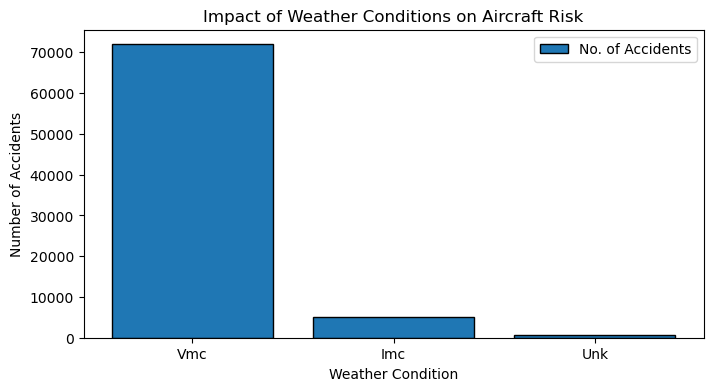

In [469]:
# Count occurrences of each weather condition
weather_risk_counts = filtered_df["Weather.Condition"].value_counts()

# Plotting the bar
plt.figure(figsize=(8, 4))
plt.bar(weather_risk_counts.index, weather_risk_counts.values, edgecolor='black', label='No. of Accidents')

# Labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Impact of Weather Conditions on Aircraft Risk')
plt.legend()

plt.show()


#### Explanation
The weather conditions abbreviations are defined as:
 - ***VMC: Visual Meteorological Conditions***
These are weather conditions where pilots can safely navigate and maintain separation from terrain and other aircraft using visual references (like the horizon, landmarks, or other aircraft).
 - ***IMC: Instrument Meteorological Conditions***
These weather conditions necessitate pilots to rely primarily on flight instruments for navigation and separation, rather than visual references.
 - ***UNK: Unknown***
These weather conditions necessitate pilots to rely primarily on flight instruments for navigation and separation, rather than visual references.

Most of the accidents lie under VMC, where pilots can safely navigate therefore, weather condition might not be a risk because we expected most accidents to occur when the weather conditions are unfavourable

#### **1.2 Does the engine type contribute to any risk?**

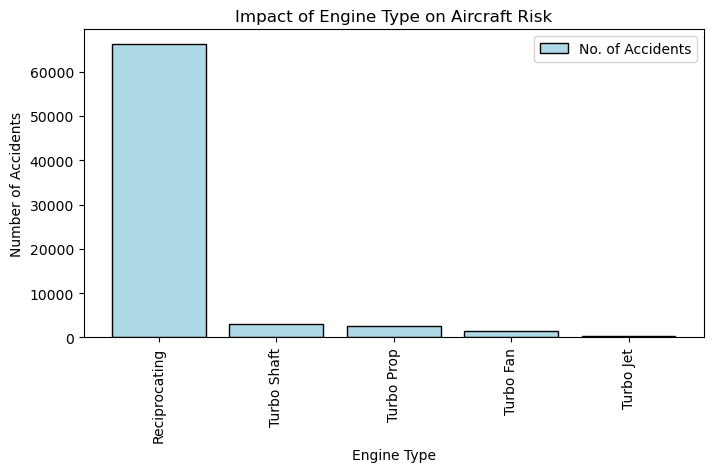

In [470]:
# Count occurrences of each accident
engine_counts = filtered_df[filtered_df["Engine.Type"] != "Unknown"]["Engine.Type"].value_counts().head(5)

# Plotting the bar
plt.figure(figsize=(8, 4))
plt.bar(engine_counts.index, engine_counts.values, edgecolor='black', color='lightblue', label='No. of Accidents')

# Labels and title
plt.xlabel('Engine Type')
plt.ylabel('Number of Accidents')
plt.title('Impact of Engine Type on Aircraft Risk')
plt.legend()

plt.xticks(rotation=90)
plt.show()


##### **Explanation**

- Reciprocating engines are commonly found in general aviation (small aircraft, training planes, and older models), which may contribute to the higher accident count.

- Turbine engines (Turbo Shaft, Turbo Jet, etc.) are primarily used in commercial and military aircraft, which undergo stricter maintenance and operational controls.

#### **1.3 Does the number of engine cause any impact to the aircraft?**

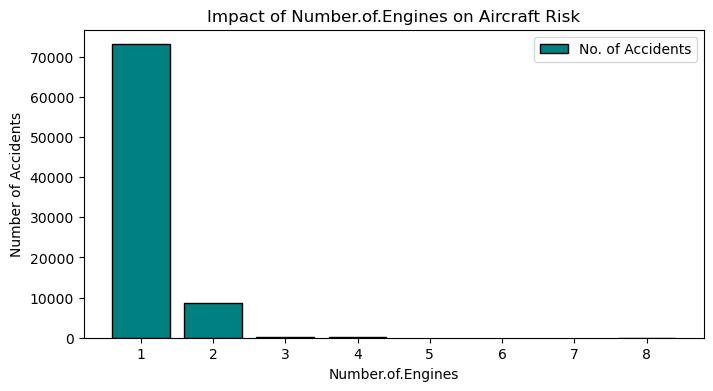

In [471]:
 #Count occurrences of each accident
engine_counts = filtered_df["Number.of.Engines"].value_counts().head(5)

# Plotting the bar
plt.figure(figsize=(8, 4))
plt.bar(engine_counts .index, engine_counts.values, edgecolor='black',color='teal', label='No. of Accidents')

# Labels and title
plt.xlabel('Number.of.Engines')
plt.ylabel('Number of Accidents')
plt.title('Impact of Number.of.Engines on Aircraft Risk')
plt.legend()

plt.xticks(rotation=0)
plt.show()


##### **Explanation**
- Single engine:If the only engine fails, there’s no backup to keep the aircraft in the air.

- Multi-Engine:Planes Have a Backup: Larger planes with two or more engines can continue flying even if one engine fails.

#### **1.4 Does the model contribute to any risk?**

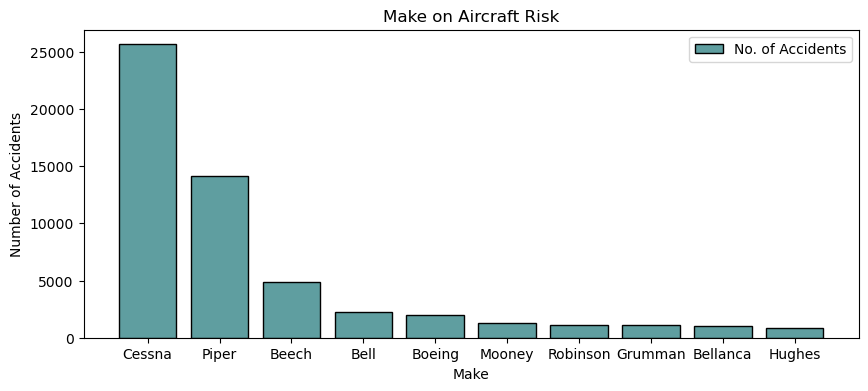

In [472]:
#Count occurrences of each accident
make_counts = filtered_df["Make"].value_counts().head(10)

# Plotting the bar
plt.figure(figsize=(10, 4))
plt.bar(make_counts .index, make_counts.values, edgecolor='black',color="cadetblue", label='No. of Accidents')

# Labels and title
plt.xlabel('Make')
plt.ylabel('Number of Accidents')
plt.title('Make on Aircraft Risk')
plt.legend()

plt.xticks(rotation=0)
plt.show()


Cessna has the highest accident count. 
We can assume this is because of it is less costly for purchasing and maintenance.

#### **1.5 Does the aircraft category affect risk?**

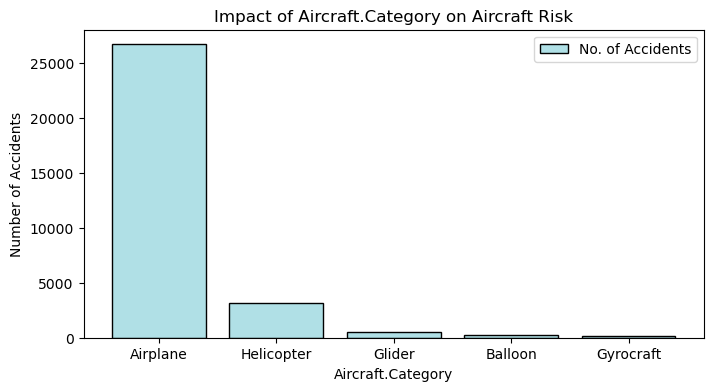

In [473]:
#Count occurrences of each accident
accident_counts = filtered_df["Aircraft.Category"].value_counts().head(5)

# Plotting the bar
plt.figure(figsize=(8, 4))
plt.bar( accident_counts.index, accident_counts.values, edgecolor='black',color='powderblue', label='No. of Accidents')

# Labels and title
plt.xlabel('Aircraft.Category')
plt.ylabel('Number of Accidents')
plt.title('Impact of Aircraft.Category on Aircraft Risk')
plt.legend()

plt.xticks(rotation=0)
plt.show()

Airplanes have the highest number of accidents.
This could be because airplanes are the most commonly used aircraft for commercial, private, and general aviation

#### **1.6 Which phases of flight contribute most to accidents/the riskiest**

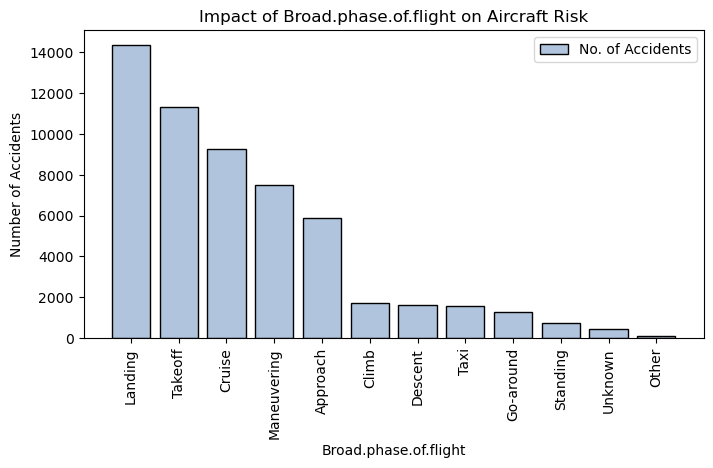

In [474]:
#Count occurrences of each accident
accident_counts = filtered_df["Broad.phase.of.flight"].value_counts()

# Plotting the bar
plt.figure(figsize=(8, 4) ,facecolor='white')
plt.bar( accident_counts.index, accident_counts.values, edgecolor='black',color='lightsteelblue', label='No. of Accidents')

# Labels and title
plt.xlabel('Broad.phase.of.flight')
plt.ylabel('Number of Accidents')
plt.title('Impact of Broad.phase.of.flight on Aircraft Risk')
plt.legend()

plt.xticks(rotation=90)
plt.show()

**Takeoff**: Aircraft accelerates and lifts off; risks include engine failure and runway incidents.

**Climb**: Gaining altitude; potential risks involve engine stress and weather conditions.

**Cruise**: Steady flight at altitude; generally safest but can face turbulence or system failures.

**Maneuvering**: Sharp turns, aerobatics, or low-altitude flying; high risk of loss of control.

**Approach**: Preparing to land; risks include misalignment, weather, and visibility issues.



#### Examine accident occurrences over time

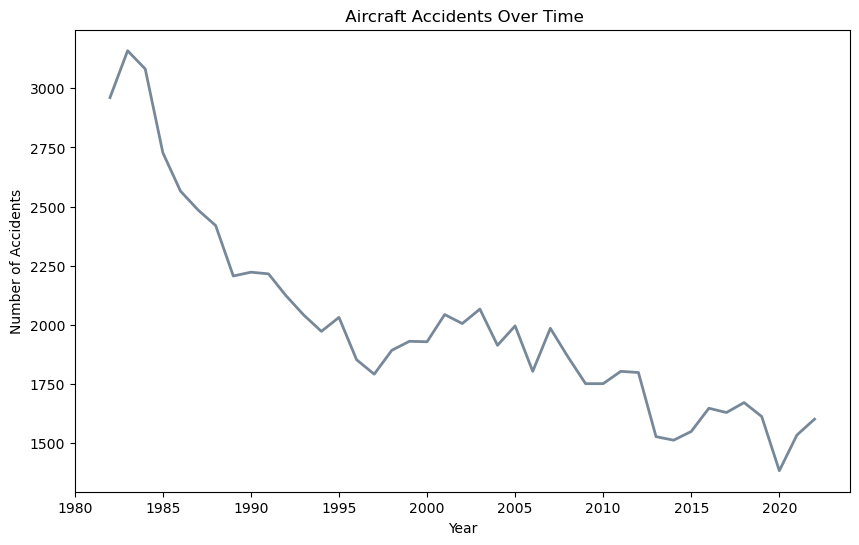

In [475]:
# Extract the year from the 'Date' column
filtered_df.loc[:, "Year"] = filtered_df["Event.Date"].dt.year

# Filter data from 1980 onwards
filtered_df = filtered_df[filtered_df["Year"] >= 1982]  # Fixed to include 1980

# Count accidents per year
year_accidents = filtered_df["Year"].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(year_accidents.index, year_accidents.values, linestyle='-', color='lightslategrey', linewidth=2)

# Labels and title
plt.xlabel("Year") 
plt.ylabel("Number of Accidents")
plt.title(" Aircraft Accidents Over Time")


# Show plot
plt.show()


As years go by there is a drop in accident numbers we assume this could be due to improvements in aircraft design(engine type and control systems), pilot training, air traffic control, and safety regulations causing a decrease in accidents.


### Determining whether it is better purchasing and operating airplanes for commercial or private enterprises

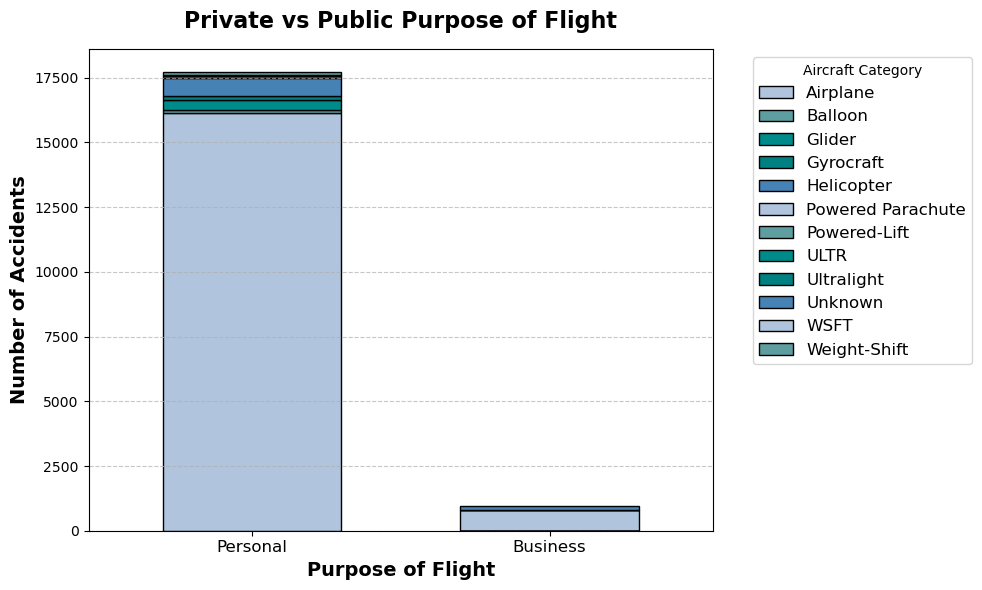

In [476]:
# Filter dataset for only "Personal" and "Business" flights
filtered_purposes = ["Personal", "Business"]
df_filtered = df[df["Purpose.of.flight"].isin(filtered_purposes)]

# Count occurrences of accidents grouped by Aircraft Category
accident_counts = df_filtered.groupby(["Purpose.of.flight", "Aircraft.Category"]).size().unstack()


accident_counts = accident_counts.reindex(["Personal", "Business"])
colors = ["lightsteelblue", "cadetblue", "darkcyan", "teal", "steelblue"]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")
accident_counts.plot(kind="bar", stacked=True, ax=ax, color=colors, edgecolor="black", width=0.6)

# Labels and title
ax.set_xlabel("Purpose of Flight", fontsize=14, fontweight="bold")
ax.set_ylabel("Number of Accidents", fontsize=14, fontweight="bold")
ax.set_title("Private vs Public Purpose of Flight", fontsize=16, fontweight="bold", pad=15)

ax.set_xticklabels(accident_counts.index, rotation=0, fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Move the legend outside the plot
ax.legend(title="Aircraft Category", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

# Show plot with better layout
plt.tight_layout()
plt.show()


Personal flights have the highest number of accidents withe the airplane being the biggest contributor.
Airplanes are less costly in purchase and maintance compared to the other eg helicopters.

### Determining which aircraft are the lowest risk for the company when starting this new business endeavor.

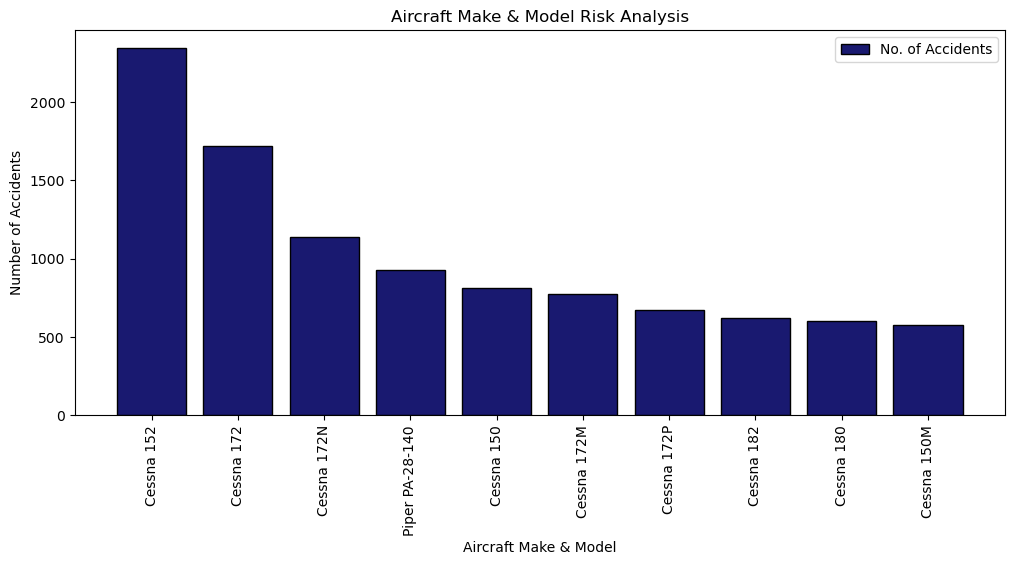

In [477]:
# Count occurrences of combined Make and Model without creating a new column
make_model_counts = filtered_df.groupby(["Make", "Model"]).size().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(12, 5))
plt.bar(make_model_counts.index.map(lambda x: f"{x[0]} {x[1]}"), make_model_counts.values, 
        edgecolor='black', color="midnightblue", label='No. of Accidents')

# Labels and title
plt.xlabel('Aircraft Make & Model')
plt.ylabel('Number of Accidents')
plt.title('Aircraft Make & Model Risk Analysis')
plt.legend()


plt.xticks(rotation=90)

# Show the plot
plt.show()


#### Conclusion
Many of these aircraft are olderlike the Cessna 150 and 172M
Older planes may have more mechanical issues or wear-and-tear, especially if not properly maintained, which can contribute to accidents.

### <u>**Conclusion**</u> -
-In the first Objective we can conclude that :
  - Weather conditions is not a major risk factor.
  - The number of engines might influence accidents ,we could see aircrafts with fewer engines had most accidents.
    This might be due to the size of the aircraft.
  - The engine type might also be a risk factor with Reciprocating being the highest.Could it be prone to engine failure?
  - The aicraft make is also a risk factor with Cessna being the most involved in accidents,Cessnaa is affordable therefore can be the reason
  - Broad phase. of flight is also a risk factor with landing causing the major cause of accidents.
   This could because of many factor such as the landing gear/tire or pilot skills
- The second objective we can conclude that:
  - As years go by there is a drop in accident numbers.
We assume this could be due toan improvement in aircraft design(engine type and control systems), pilot training, air traffic control, and safety regulations causing a decrease in accidents.
- In the third objective we can conclude:
  - Personal flights have the highest number of accidents withe the airplane being the biggest contributor.
      Airplanes are less costly in purchase and maintance compared to the other eg helicopters.
- In the last ojective:
     - We can conclude that from the model and make of aircraft with most accidents,most of them are old hence there performance reduces with time.

### <u>**Recommendation**</u> 

 - Use modern model aircrafts since they are not worn out hence reducing risk due to model.  
There will also be chances that theyre are advernsment in these aerolanes.
 - Invest in business purpose rather than private since they have lesser risk.  
 - Use aircrafts with turbo engine type where the purpose is aerial application instead of Reciprocating Engines 
- Incase you want to venture into personal flights use helicopters instead of airplanes.
They can be expensive to purchase and maintain but its less risky